# Visualizing Uncertainties

For any scientific measurement, accurate accounting of uncertainties is nearly as important, if not more so, as accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 70 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of 70 ± 2.5 (km/s)/Mpc, and my method has measured a value of 74 ± 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

One standard way to visualize uncertainties is using an errorbar. A basic errorbar can be created with a single Matplotlib function call, as shown in the following figure:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

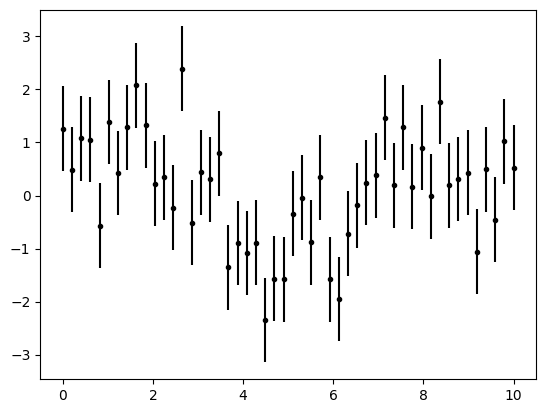

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and it has the same syntax as the shorthand used in `plt.plot`, outlined in the previous chapter and earlier in this chapter.

In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves (see the following figure):

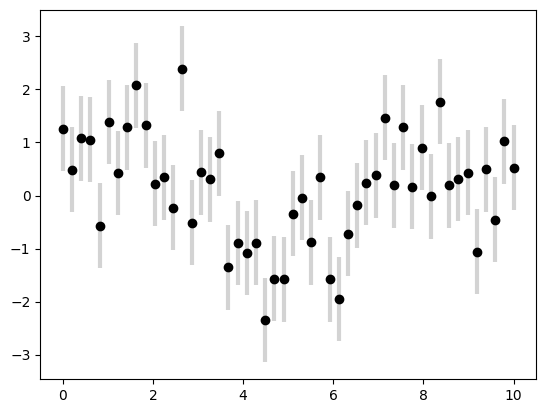

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars, one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of `plt.errorbar`.

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like `plt.plot` and `plt.fill_between` for a useful result.

Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API (see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) for details).
This is a method of fitting a very flexible nonparametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

We now have `xfit`, `yfit`, and `dyfit`, which sample the continuous fit to our data.
We could pass these to the `plt.errorbar` function as in the previous section, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the `plt.fill_between` function with a light color to visualize this continuous error (see the following figure):

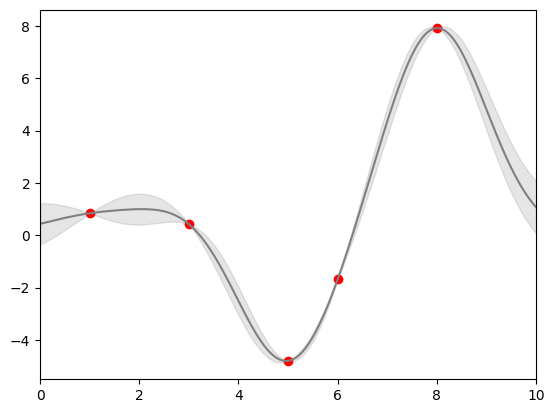

In [6]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Take a look at the `fill_between` call signature: we pass an x value, then the lower *y*-bound, then the upper *y*-bound, and the result is that the area between these regions is filled.

The resulting figure gives an intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained, and this is reflected in the small model uncertainties.
In regions far from a measured data point, the model is not strongly constrained, and the model uncertainties increase.

For more information on the options available in `plt.fill_between` (and the closely related `plt.fill` function), see the function docstring or the Matplotlib documentation.

Finally, if this seems a bit too low-level for your taste, refer to [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), where we discuss the Seaborn package, which has a more streamlined API for visualizing this type of continuous errorbar.